In [4]:
import spacy.cli
spacy.cli.download( )

TypeError: download() missing 1 required positional argument: 'model'

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('spam.csv',encoding = 'latin-1')

In [7]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
data = data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
data['v1'] = data['v1'].replace({'ham':1, 'spam':0})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


<Axes: ylabel='count'>

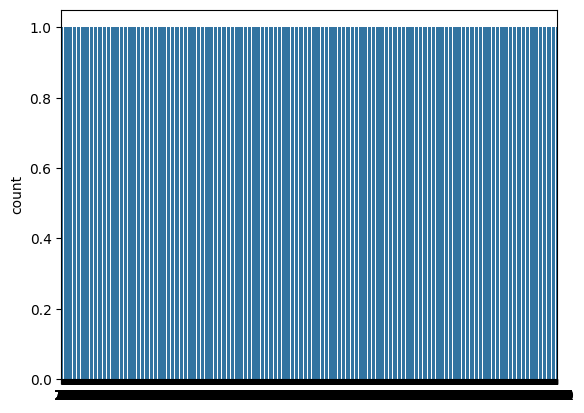

In [13]:
sns.countplot(data['v1'])

In [14]:
data['v1'].value_counts()

v1
1    4825
0     747
Name: count, dtype: int64

In [15]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siddardha.kancharla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [17]:
corpus=[]

In [18]:
data['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [19]:
for i in range(0,len(data)):
    message = re.sub('[^a-zA-Z]' , ' ',data['v2'][i])
    message = message.lower()
    message =message.split()
    ss = SnowballStemmer(language = 'english')
    message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
    message = ' '.join(message)
    corpus.append(message)

In [20]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = data['v1']

In [22]:
x.shape

(5572, 6216)

In [23]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 1)

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
mn = MultinomialNB()
mn.fit(x_train,y_train)

MultinomialNB()

In [28]:
y_pred = mn.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
score = accuracy_score(y_test,y_pred)

In [31]:
print(score)

0.9820627802690582


In [32]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))

0.994824016563147
0.9846311475409836


<Axes: >

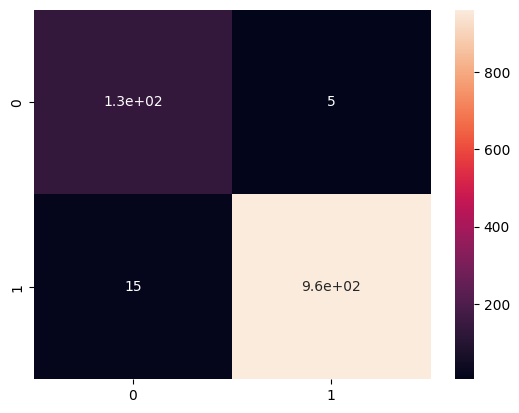

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [34]:
txt = 'congratulations you won scratch card to claim click on the link'

In [35]:
txt = np.array([txt])

In [36]:
txt = cv.transform(txt)

In [37]:
mn.predict(txt)

array([0])

In [38]:
mn = mn.fit(x,y)

In [39]:
import joblib

In [40]:
joblib.dump(mn,'sms_spam_detector')

['sms_spam_detector']

In [41]:
model = joblib.load('sms_spam_detector')

In [42]:
new = 'congratulations you got seat in marwadi university'

In [43]:
new = np.array([new])

In [44]:
new = cv.transform(new)

In [45]:
vectorizer_filename = "vectorizer.pkl"
joblib.dump(cv, vectorizer_filename)

print(f"Vectorizer saved to: {vectorizer_filename}")

Vectorizer saved to: vectorizer.pkl


In [46]:
model.predict(new)

array([1])